# CO407H - Medical Image Computing

## Tutorial 1 - Introduction, visualisation, processing

In [3]:
# Use full browser width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Loading a 3D medical image

In this course, we will be using a library called SimpleITK to handle medical image files. It is a simplified interface around the Insight Segmentation and Registration Toolkit (ITK), one of the most popular C++ image processing libraries for medical imaging.

In [4]:
import SimpleITK as sitk

We will use it primarily for reading and saving medical volumes encoded in NIfTI format, with the functions `sitk.ReadImage(<file_path>)` and `sitk.WriteImage(<image object>, <file_path>)`, respectively.

**Task:** Try loading the image `"ct-brain.nii.gz"` in our data directory `data_dir`:

In [6]:
data_dir = "/Users/fair00542/Desktop/MachineLearning/python tutorials/tutorial1/"
img = sitk.ReadImage(data_dir + "ct-brain.nii.gz")

### Explore image information

Medical image files typically store raw volumetric data as a three-dimensional array. In addition, formats such as NIfTI and DICOM include a header containing a wealth of meta-information, such as:
- size: number of voxels in each dimension
- resolution/spacing: physical size of a voxel (e.g. 1mm x 1mm x 1mm)
- data type: e.g. `int32`, `uint8`, `float64`, vectors (+ number of components)
- scanner's origin and direction of coordinate axes
- voxel coordinate transformation matrices
- ... and [much more](https://brainder.org/2012/09/23/the-nifti-file-format/).

**Task:** Print the SimpleITK image object to see a summary of the loaded meta-information:

In [7]:
# Print image object

In [8]:
print(img)

Image (0x7f96b58c1330)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 1
  Modified Time: 1074
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1053
  UpdateMTime: 1073
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 243]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 243]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 243]
  Spacing: [0.423828, 0.423828, 0.7]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.423828 0 0
0 0.423828 0
0 0 0.7

  PointToIndexMatrix: 
2.35945 0 0
0 2.35945 0
0 0 1.42857

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x7f96b58a90b0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, short>
      Reference C

SimpleITK also allows us to access each field directly.

**Task:** Let us have a look at the size and spacing of this image, with the methods `<image>.GetSize()` and `<image>.GetSpacing()`:

In [9]:
# Print image size and spacing

In [10]:
print(img.GetSize())
print(img.GetSpacing())

(512, 512, 243)
(0.423828125, 0.423828125, 0.699999988079071)


Although SimpleITK offers great functionality for manipulating the raw image data, we will often need to convert it to a NumPy array so it plays well with other Python packages, such as Matplotlib, which we will use for visualisation. This is done with the function `sitk.GetArrayFromImage(<image>)` (and vice-versa with `sitk.GetImageFromArray(<array>)`).

**Task:** Convert the SimpleITK image to a NumPy array

In [11]:
img_array = sitk.GetArrayFromImage(img) # Convert the SimpleITK image to a NumPy array

If you are curious about what else SimpleITK Image class offers, [this](http://simpleitk.github.io/SimpleITK-Notebooks/01_Image_Basics.html) is a good place to look. Additionally, you can run Python's `help` command on your image object to see all the available methods.

### Visualisation

The NumPy array you obtained from SimpleITK is three-dimensional, meaning we cannot visualise it directly. Fortunately, NumPy allows you to access entire 2D slices at a time, with `img_array[<z index>,:,:]`, `img_array[:,<y index>,:]` or `img_array[:,:,<x index>]`.

**Task:** Try printing a slice of your choice:

In [12]:
# Print an image slice

In [13]:
print(img_array[100])

[[ -995  -989  -988 ...,  -997  -998 -1001]
 [ -996  -992  -990 ...,  -998 -1001 -1002]
 [-1000  -996  -993 ..., -1002 -1002 -1000]
 ..., 
 [ -993  -996 -1000 ...,  -997  -999  -996]
 [ -996  -999 -1002 ...,  -997  -999  -997]
 [ -998 -1000 -1002 ...,  -996  -997  -996]]


As expected, we get a large two-dimensional array filled with numbers we cannot directly interpret.

To graphically display volume slices, we will use a library called Matplotlib. It is the most widely-used Python plotting library, and offers, beside more advanced functionality, a simple command-based interface, similar to Matlab's.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

To display images, Matplotlib offers the function `plt.imshow(<array>)`. It has [many options](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow),  including which colour map to use to visualise the given data (`cmap`). We will typically want to visualise medical images in greyscale (`cmap='gray'`), but feel free to play with [any of the ones available](http://matplotlib.org/examples/color/colormaps_reference.html).

By default, Matplotlib will place the origin of the y-axis at the top, increasing downwards. We can reverse it with the option `origin='lower'`.

**Task:** Investigate how to visualise axial (xy), coronal (xz) and sagittal (yz) slices according to the radiological convention as discussed in the introductory lecture (slide 63).

In [15]:
# Display image slices

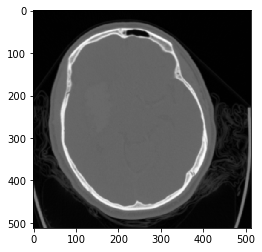

In [16]:
plt.imshow(img_array[100,:,:], cmap='gray');

If you tried coronal (xz) or sagittal (yz) slices, you will have noticed that the aspect ratio was wrong: the image seems 'squashed' in one dimension. This is because the resolution of this scan is *anisotropic*, i.e. the voxels do not have the same length in all directions (compare slide 90 in the lecture slides).

`plt.imshow` has an option that lets you rescale the axes: `extent=(<left>, <right>, <bottom>, <top>)`.

**Task:** Using the `GetSize` and `GetSpacing` methods discussed earlier (note that SimpleITK's indexing convention is XYZ, whereas NumPy's is ZYX), try to set the display axes to the correct scale, in millimetres.

In [17]:
# Obtain the pysical dimensions of the image, in millimetres
size = img.GetSize()
spacing = img.GetSpacing()

width  = size[0] * spacing[0]
height = size[1] * spacing[1]
depth  = size[2] * spacing[2]

In [18]:
# Display axial slice with the correct dimensions

In [ ]:
plt.imshow(img_array[100,:,:], cmap='gray', extent=(0, width, height, 0));

In [ ]:
# Display coronal slice with the correct dimensions

In [ ]:
plt.imshow(img_array[:,180,:], origin='lower', cmap='gray', extent=(0, width, 0, depth));

In [ ]:
# Display sagittal slice with the correct dimensions

In [ ]:
plt.imshow(img_array[:,:,150], origin='lower', cmap='gray', extent=(0, height, 0, depth));

### Image statistics

Since the image data is numerical, it often makes sense to look at some of its statistics. Many basic statistics are readily available in NumPy, e.g. `np.min`, `np.max`, `np.mean`, `np.std` (standard deviation), `np.percentile` etc.

**Task:** Have a look at the minimum, maximum and mean values of your image array.

In [ ]:
import numpy as np

# Print minimum, maximum and mean of image array

In [ ]:
print(np.min(img_array), np.max(img_array), np.mean(img_array))

To get a better idea of the distribution of intensities, it is helpful to analyse the image *histogram*. It is a simple bar plot expressing the frequencies of pixel intensity values found in the data array, in regularly-spaced intervals ('bins').

**Task:** Use Matplotlib's `plt.hist` function to display the distribution of intensities in your image:
```
plt.hist(<array>.flatten(), bins=<no. bins>, normed=True)
```

In [ ]:
# Plot the image histogram with values for the number of bins, e.g, 32, 64, 128, 256

In [ ]:
plt.hist(img_array.flatten(), bins=128, normed=True);

You will notice two main peaks in the histogram with the left corresponding to values between -1000 and -500. This is the "background" area of the image corresponding to non-tissue or air. This area often takes a significant part of the image domain.

**Task:** Try plotting the histogram again by excluding pixels from the background region, and once more plotting only values close to the second peak (in the range [-500,500]). Hint: use logical operators on the NumPy array.

In [ ]:
plt.hist(img_array.flatten()[img_array.flatten() > -500], bins=256, normed=True);

In [ ]:
plt.hist(img_array.flatten()[np.logical_and(img_array.flatten() > -500,img_array.flatten() < 500)], bins=256, normed=True);

### Window/Level

As discussed in the introductory lecture, in general, medical images have pixel intensity ranges beyond the typical 256 grayscales (8-bit) that we know from conventional digital images. The loaded CT scan, for example, has a range of about [-1000,2000].

By default, `plt.imshow` will display the entire intensity range, mapping the minimum and maximum values in the array to the extremes of the colour scale. However, we can manually specify the display range, setting `clim=(<low>, <high>)` or independently `vmin=<low>` and/or `vmax=<high>`.

**Task:** Using the concept of window/level as discussed on slide 65 in the introductory lecture slides, think about how to calculate parameters `clim=(<low>, <high>)` given a particular set of values for window and level. Also think about formulae for calculating the window and level that capture the full range of image intensities.

In [ ]:
# Calculate parameters low and high from window and level
def wl_to_lh(window, level):
    low = level - window/2
    high = level + window/2
    return low,high

print(wl_to_lh(160,70))
print(wl_to_lh(2000,300))
print(wl_to_lh(350,50))

**Task:** Explore displaying the loaded brain CT scan `"ct-brain.nii.gz"` with different window/level settings. For example, using a window = 120 and level = 40 should give a good setting for displaying brain tissue. Other useful settings for CT images are a window = 2000 and level = 300 for good bone contrast, or window = 350 and level = 50 for abdominal organs. See if you can find other useful settings based on the table given on slide 36 in the lecture slides.

In [ ]:
# Display image slices with different window/level settings

In [ ]:
low,high = wl_to_lh(120,40)
plt.imshow(img_array[100,:,:], cmap='gray', clim=(low, high));

**Task:** Try also some of the other images provided in the data folder, such as `"ct-abdomen.nii.gz"` for an abdominal CT scan showing organs such as the liver or kidneys, or `"mri-brain.nii.gz"` for an example of a brain MRI scan. Try to find a good window/level setting for the MRI scan that shows good contrast for gray and white matter tissue (Hint: z-slice 130 shows a good cross-section through the ventricles).

In [ ]:
import os

# Display other images with different window/level settings
print(os.listdir(data_dir))

In [ ]:
img_mri = sitk.ReadImage(data_dir + 'mri-brain.nii.gz')

low,high = wl_to_lh(300,200)
plt.imshow(sitk.GetArrayFromImage(img_mri)[130,:,:], cmap='gray', clim=(low, high));

### Multiplanar Image Viewer

**Task:** Now try writing a function to visualise an arbitrary medical volume, based on what you have done so far. It should take as input a SimpleITK image object (`img`), the slice indices (`x,y,z`) and window/level parameters (`window,level`), and display the specified axial (`z`), coronal (`y`) and sagittal (`x`) slices in grayscale and with correct axis dimensions and window/level contrast.

Note: If (`x,y,z`) are not specified (`=None`), the function should display the centre slices. If (`window,level`) are not specified, the function should calculate the window/level setting to cover the full intensity range. When displaying `"mri-brain.nii.gz"` you should be able to re-create the figure on slide 63 in the introductury lectures slides.

In [ ]:
def display_image(img, x=None, y=None, z=None, window=None, level=None):
    # Convert SimpleITK image to NumPy array
    img_array = sitk.GetArrayFromImage(img)
    
    # Get image dimensions in millimetres
    size = img.GetSize()
    spacing = img.GetSpacing()
    width  = size[0] * spacing[0]
    height = size[1] * spacing[1]
    depth  = size[2] * spacing[2]
    
    if x is None:
        x = np.floor(size[0]/2).astype(int)
    if y is None:
        y = np.floor(size[1]/2).astype(int)
    if z is None:
        z = np.floor(size[2]/2).astype(int)
    
    if window is None:
        window = np.max(img_array) - np.min(img_array)
    
    if level is None:
        level = window / 2 + np.min(img_array)
    
    low,high = wl_to_lh(window,level)

    # Display the orthogonal slices
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    ax1.imshow(img_array[z,:,:], cmap='gray', clim=(low, high), extent=(0, width, height, 0))
    ax2.imshow(img_array[:,y,:], origin='lower', cmap='gray', clim=(low, high), extent=(0, width,  0, depth))
    ax3.imshow(img_array[:,:,x], origin='lower', cmap='gray', clim=(low, high), extent=(0, height, 0, depth))

    # Additionally display crosshairs
    ax1.axhline(y * spacing[1], lw=1)
    ax1.axvline(x * spacing[0], lw=1)
    
    ax2.axhline(z * spacing[2], lw=1)
    ax2.axvline(x * spacing[0], lw=1)
    
    ax3.axhline(z * spacing[2], lw=1)
    ax3.axvline(y * spacing[1], lw=1)

    plt.show()

The code below should give you an interactive way of displaying 3D medical images based on your `display_image` function.

In [ ]:
from ipywidgets import interact, fixed
from IPython.display import display

def interactive_view(img):
    size = img.GetSize()
    img_array = sitk.GetArrayFromImage(img)
    interact(display_image,img=fixed(img),
             x=(0, size[0] - 1),
             y=(0, size[1] - 1),
             z=(0, size[2] - 1),
             window=(0,np.max(img_array) - np.min(img_array)),
             level=(np.min(img_array),np.max(img_array)));

interactive_view(img)

### Accessing voxel values

In Python, we can access a single element of a sequence with an integer index (`[index]`), or we can retrieve a contiguous sub-sequence with so-called *slice notation*: `[start:stop]`. Either or both arguments can be left blank: `[start:]` (`stop` defaults to the end), `[:stop]` (`start` defaults to `0`) or `[:]` (entire sequence).

A multi-dimensional array (such as our CT volume) can be indexed simultaneously in all dimensions, allowing us to access not only 2D slices, but also lines, rectangles, cuboids or individual voxels. A complete reference for NumPy array indexing can be found [here](https://docs.scipy.org/doc/numpy-1.11.0/reference/arrays.indexing.html).

**Task:** Explore the indexing options for extracting 1D, 2D and 3D sub-arrays, and check the resulting shapes, e.g. `img_array[50, :, 100:120].shape`, comparing with the shape of the original array:

In [ ]:
print(img_array.shape)

In [ ]:
# Print the shape of indexed sub-arrays
print(img_array[50, :, 100:120].shape)

Indexing is not just useful for reading data in an array, we can also set values in entire regions without having to explicitly write iterative loops.

**Task:** Select any 2D slice, try setting a rectangular region to an arbitrary value and visualise the result with `plt.imshow`:

In [ ]:
# Extract a 2D slice
# Set a rectangular region to a constant (e.g. 0)
# Visualise the result with plt.imshow

img = sitk.ReadImage(data_dir + 'mri-brain.nii.gz')
slice = sitk.GetArrayFromImage(img)[120,:,:];
slice[100:150,50:150] = 400
plt.imshow(slice, cmap='gray')

### Image arithmetic

Beside simply computing statistics, we can also perform arithmetic operations with image intensities, such as multiplication by scalars, contrast adjustment or any pointwise function (e.g. [gamma correction](https://en.wikipedia.org/wiki/Gamma_correction) also known as Power-Law Transform, see slide 92 of the introductory lecture).

**Task:** Load the image `"mri-brain-t1-contrast.nii.gz"` and visualise slices (`x=105, y=170, z=95`) with window/level (`window=800, level=400`) using your `display_image` function.

In [ ]:
img1 = sitk.ReadImage(data_dir + 'mri-brain-t1-contrast.nii.gz')
display_image(img1, 105, 170, 95, 800, 400)

**Task:** Implement a function for performing gamma correction, and apply it to the `"mri-brain-t1-contrast.nii.gz"` image (e.g., using (`c=10, gamma=3`)).

Note, for gamma correction you should first normalise the image intensity range to [0,1], apply gamma correction, and transform back to the original range. Some operations require the image data type to be floating point (`float`). NumPy arrays can be easily converted using `astype(<dtype>)`.

In [ ]:
def gamma_correction(img, c, gamma):
    img_array = sitk.GetArrayFromImage(img).astype(float)
    min_value = np.min(img_array)
    max_value = np.max(img_array)    
    img_array = (img_array - min_value) / (max_value - min_value)
    img_array = c * np.power(img_array,gamma)
    img_array = img_array * (max_value - min_value) + min_value
    return sitk.GetImageFromArray(img_array)    

In [ ]:
img1_corrected = gamma_correction(img1, 10, 3)
display_image(img1_corrected, 105, 170, 95, 800, 400)

For the image above, an intravenous contrast agent has been used to highlight blood and tumourous tissue. In this case, we also have a corresponding brain scan taken before the contrast agent has been administered.

** Task: ** Load the image `"mri-brain-t1.nii.gz"` and compare the two MRI scans with and without contrast using your `display_image` function. Hint: use the same window/level for both scans so you can better see the differences.

In [ ]:
img2 = sitk.ReadImage(data_dir + 'mri-brain-t1.nii.gz')

display_image(img1, 105, 170, 95, 800, 400)
display_image(img2, 105, 170, 95, 800, 400)

Note that these two images of the same patient are registered (i.e. spatially aligned).

** Task: ** Now try displaying `(img1-img2)` (SimpleITK supports arithmetics with image objects) to see what was highlighted by the contrast agent. Hint: you might need to adjust the window/level for better visibility.

In [ ]:
# Display the difference image

In [ ]:
display_image(img1-img2, 105, 170, 95, 200, 100)

** Task: ** Try the same with gamma corrected version of the contrast image. Note, you might need to convert the data type of the non-contrast image to be able to subtract it from the gamma corrected image.

In [ ]:
#  Display the difference image of the gamma corrected images

In [ ]:
img2_corrected = gamma_correction(img2, 1, 1)
display_image(img1_corrected-img2_corrected, 105, 170, 95, 200, 100)

### Intensity normalisation

When performing statistical analysis or running machine learning methods on images, it is often useful to first *standardise* the intensities, i.e. make them have zero mean and unit variance. This is achieved by subtracting the mean and dividing by the standard deviation of the intensities. In mathematical terms, the standardised image $\tilde{I}$ is computed as
$$\tilde{I} = \frac{I - \mu}{\sigma}, \qquad\qquad \mu = \frac{1}{N} \sum_{n=1}^N I_n, \quad \sigma = \sqrt{\frac{1}{N} \sum_{n=1}^N (I_n - \mu)^2},$$
where $I$ is the original image, $N$ is its total number of voxels and $I_n$ is the intensity of voxel $n$.

** Task: ** Try standardising the intensities of `img1`, using `np.mean` and `np.std`, and plot the resulting histogram:

In [ ]:
import numpy as np

img1_array = sitk.GetArrayFromImage(img1)  # Convert img1 to a NumPy array
img1_array = img1_array[img1_array > 0]    # Exclude the background voxels, with intensity 0

# img1_array is now an unstructured 'flat' array containing only the intensities of the brain voxels

# Compute its mean and standard deviation
# Standardise the intensity array
# Plot the histogram before and after normalisation

In [ ]:
plt.hist(img1_array, bins=100, normed=True);

In [ ]:
plt.hist((img1_array-np.mean(img1_array)) / np.std(img1_array), bins=100, normed=True);

### Image enhancement

We can also automatically enhance the contrast with [*histogram equalisation*](https://en.wikipedia.org/wiki/Histogram_equalization). As we have seen in the lecture (from slide 97 onward), it is a transformation applied to the image intensities which makes their distribution roughly uniform, i.e. all values occur approximately equally often in the image. Although it is not ideal for every application, the method is fast, simple to implement and useful for visualisation.

Below we define a function, `hist_eq`, which equalises the histogram of a given array, taking as input also the desired number of histogram bins (defaults to the maximum). The resulting array will have its values distributed almost uniformly between the original minimum and maximum values. The helper function `hist_eq_img` does exactly the same but can be called directly on SimpleITK images.

** Task: ** Try to understand the individual steps of the implementation of `hist_eq`.

In [ ]:
def hist_eq(data, nbins=None):
    shape = data.shape
    data_min, data_max = data.min(), data.max()
    data = data.flatten()

    # nbins defaults to the integer range of values
    if nbins is None:
        nbins = int(data_max - data_min)

    # Compute image histogram
    counts, bins = np.histogram(data, bins=nbins)
    
    # Compute cumulative distribution function (CDF)
    cdf = counts.cumsum() / counts.sum()
    
    # Use linear interpolation of CDF to find new intensity values
    data_eq = np.interp(data, bins[:-1], (data_max - data_min) * cdf + data_min)
                    
    return data_eq.reshape(shape)

def hist_eq_img(img, nbins=None):
    data = sitk.GetArrayFromImage(img)
    data_eq = hist_eq(data, nbins)
    img_eq = sitk.GetImageFromArray(data_eq)
    img_eq.CopyInformation(img)
    return img_eq

** Task: ** Now apply `hist_eq_img` to one of the SimpleITK images you have loaded and visualise it next to its original with your `display_image`:

In [ ]:
# Apply histogram equalisation to an image
# Display original image
# Display equalised image

In [ ]:
img = sitk.ReadImage(data_dir + 'ct-brain.nii.gz')
img_orig = img
img_eq = hist_eq_img(img_orig)
print("Before histogram equalisation:")
display_image(img_orig)
print("After histogram equalisation:")
display_image(img_eq)

The following plots compare the intensity distributions before and after histogram equalisation.

In [ ]:
data_orig = sitk.GetArrayFromImage(img_orig).flatten()
data_eq = sitk.GetArrayFromImage(img_eq).flatten()

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.hist(data_orig, bins=128, normed=True, histtype='step', cumulative=False)
plt.hist(data_eq, bins=128, normed=True, histtype='step', cumulative=False)
plt.subplot(122)
plt.hist(data_orig, bins=128, normed=True, histtype='step', cumulative=True)
plt.hist(data_eq, bins=128, normed=True, histtype='step', cumulative=True);